# “Где жить хорошо: 5 фишек разных стран”

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('magma', 5))

In [3]:
data = pd.read_csv('Cost_of_Living_Index_2022.csv')
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
1,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
2,2,Albania,35.5,8.47,22.83,29.32,25.82,30.19
3,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
4,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  140 non-null    object
 1   Unnamed: 1  140 non-null    object
 2   Unnamed: 2  140 non-null    object
 3   Unnamed: 3  140 non-null    object
 4   Unnamed: 4  140 non-null    object
 5   Unnamed: 5  140 non-null    object
 6   Unnamed: 6  140 non-null    object
 7   Unnamed: 7  140 non-null    object
dtypes: object(8)
memory usage: 8.9+ KB


In [5]:
headers = data.iloc[0]
data = data.rename(columns=headers).drop(labels=0, axis=0)
data.columns = [x.lower() for x in data.columns]
data.head(2)

,rank,country,cost of living index,rent index,cost of living plus rent index,groceries index,restaurant price index,local purchasing power index
1,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
2,2,Albania,35.5,8.47,22.83,29.32,25.82,30.19


In [6]:
cols = data.columns.drop('country')
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

Выделим по 5 стран с самыми высокими и самыми низкими значениями каждого индекса. 

In [7]:
living_max = data.sort_values(by='cost of living index', ascending=False).head(5)
living_min = data.sort_values(by='cost of living index', ascending=True).head(5)

In [8]:
rent_max = data.sort_values(by='rent index', ascending=False).head(5)
rent_min = data.sort_values(by='rent index', ascending=True).head(5)

In [9]:
living_rent_max = data.sort_values(by='cost of living plus rent index', ascending=False).head(5)
living_rent_min = data.sort_values(by='cost of living plus rent index', ascending=True).head(5)

In [10]:
groceries_max = data.sort_values(by='groceries index', ascending=False).head(5)
groceries_min = data.sort_values(by='groceries index', ascending=True).head(5)

In [11]:
restaurant_max = data.sort_values(by='restaurant price index', ascending=False).head(5)
restaurant_min = data.sort_values(by='restaurant price index', ascending=True).head(5)

In [12]:
power_max = data.sort_values(by='local purchasing power index', ascending=False).head(5)
power_min = data.sort_values(by='local purchasing power index', ascending=True).head(5)

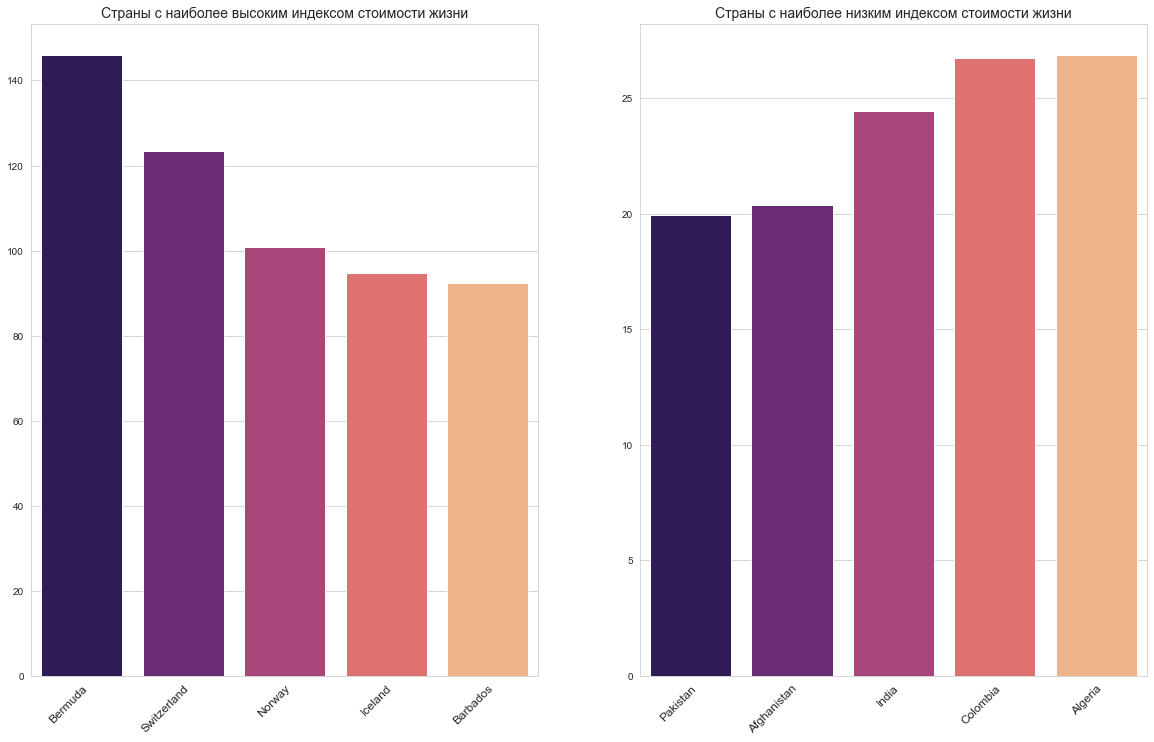

In [13]:
fig, ax=plt.subplots(1,2, figsize=(20, 12))

sns.barplot(data=living_max, x='country', y='cost of living index', ax=ax[0])
sns.barplot(data=living_min, x='country', y='cost of living index', ax=ax[1])

ax[0].set_title('Страны с наиболее высоким индексом стоимости жизни', fontsize=14)
ax[1].set_title('Страны с наиболее низким индексом стоимости жизни', fontsize=14)

labels1 = [item.get_text() for item in ax[0].get_xticklabels()]
ax[0].set_xticklabels(labels1, rotation=45, rotation_mode='anchor', ha='right', fontsize=12)
labels2 = [item.get_text() for item in ax[1].get_xticklabels()]
ax[1].set_xticklabels(labels2, rotation=45, rotation_mode='anchor', ha='right', fontsize=12)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.show()

In [14]:
data['cost of living index'].median()

44.68

Список стран-участниц G20: Аргентина, Австралия, Бразилия, Великобритания, Германия, Европейский Союз, Индонезия, Италия, Индия, КНР, Канада, Мексика, Россия, Саудовская Аравия, США, Турция, Франция, ЮАР, Южная Корея, Япония.

In [15]:
countries_20 = ['Argentina', 
                'Australia', 
                'Brazil', 
                'United Kingdom', 
                'Germany', 
                'Indonesia', 
                'Italy', 
                'India', 
                'China', 
                'Canada', 
                'Mexico', 
                'Russia', 
                'Saudi Arabia', 
                'Unated States', 
                'Turkey', 
                'France', 
                'South Africa', 
                'South Korea', 
                'Japan']

In [16]:
data_20 = data.query('country in @countries_20')
data_20.to_csv('data_20.csv', sep=',')

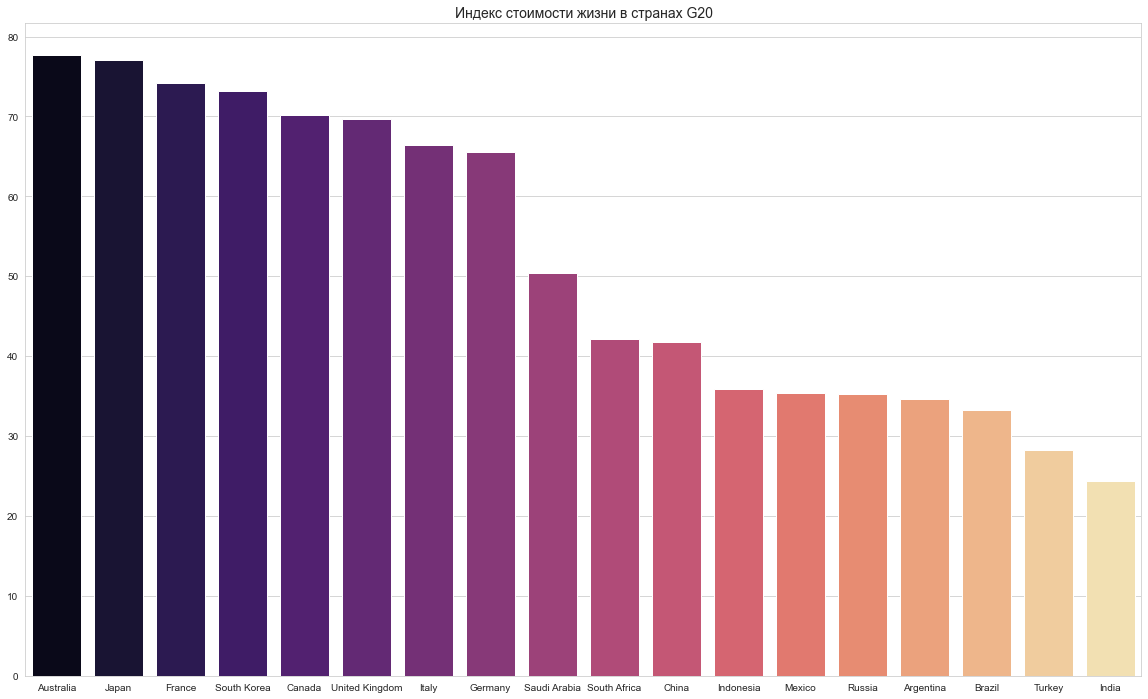

In [17]:
plt.figure(figsize=(20, 12))
sns.barplot(data=data_20.sort_values(
    by='cost of living index', ascending=False), x='country', y='cost of living index', palette='magma')
plt.xlabel('')
plt.ylabel('')
plt.title('Индекс стоимости жизни в странах G20', fontsize=14)
plt.show()

In [18]:
data_20['cost of living index'].median()

46.25

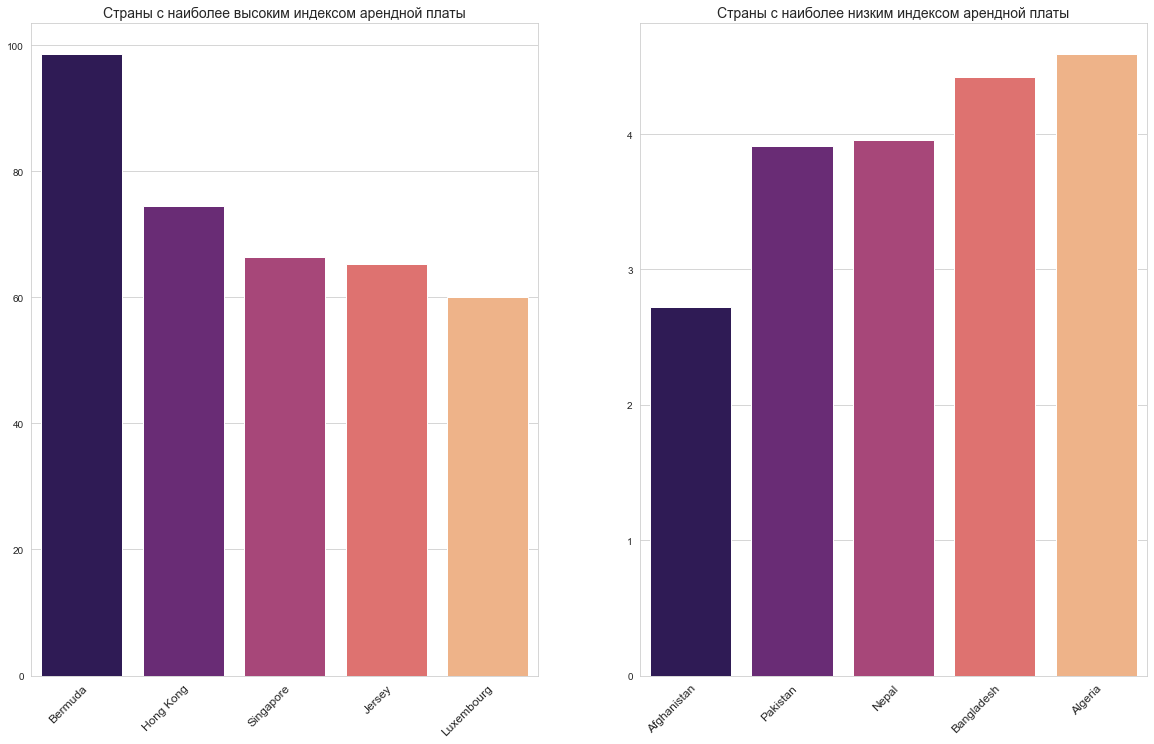

In [19]:
fig, ax=plt.subplots(1,2, figsize=(20, 12))

sns.barplot(data=rent_max, x='country', y='rent index', ax=ax[0])
sns.barplot(data=rent_min, x='country', y='rent index', ax=ax[1])

ax[0].set_title('Страны с наиболее высоким индексом арендной платы', fontsize=14)
ax[1].set_title('Страны с наиболее низким индексом арендной платы', fontsize=14)

labels1 = [item.get_text() for item in ax[0].get_xticklabels()]
ax[0].set_xticklabels(labels1, rotation=45, rotation_mode='anchor', ha='right', fontsize=12)
labels2 = [item.get_text() for item in ax[1].get_xticklabels()]
ax[1].set_xticklabels(labels2, rotation=45, rotation_mode='anchor', ha='right', fontsize=12)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.show()

In [20]:
data['rent index'].median()

13.93

In [21]:
data_20['cost of living index'].median()

46.25

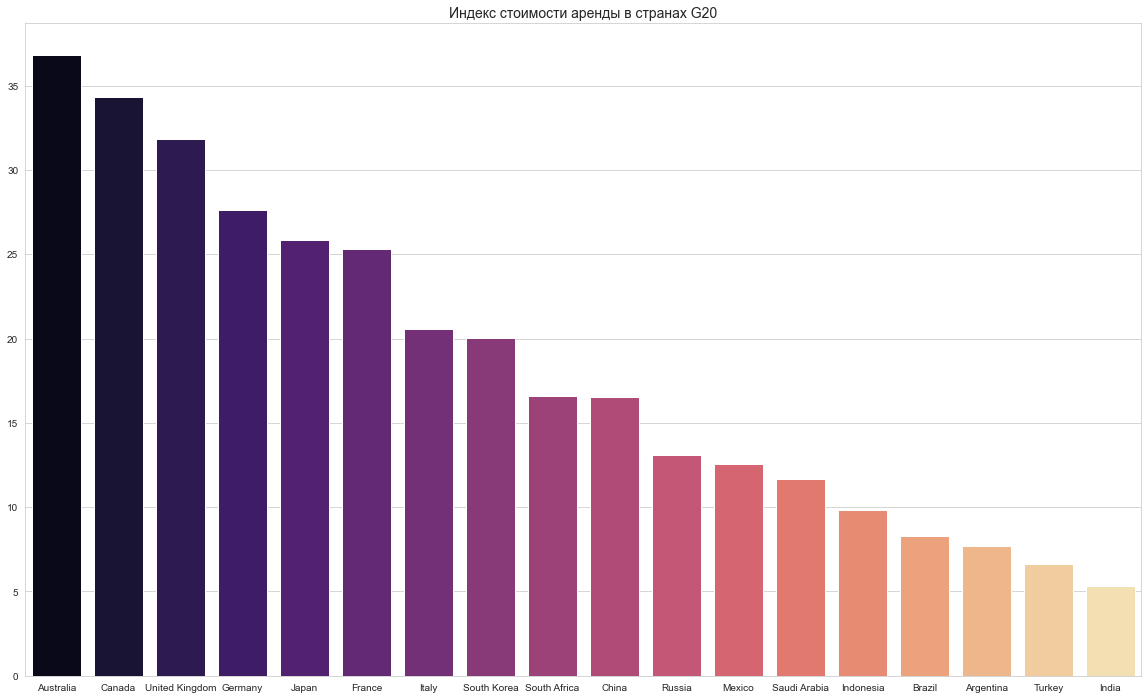

In [22]:
plt.figure(figsize=(20, 12))
sns.barplot(data=data_20.sort_values(
    by='rent index', ascending=False), x='country', y='rent index', palette='magma')
plt.xlabel('')
plt.ylabel('')
plt.title('Индекс стоимости аренды в странах G20', fontsize=14)
plt.show()

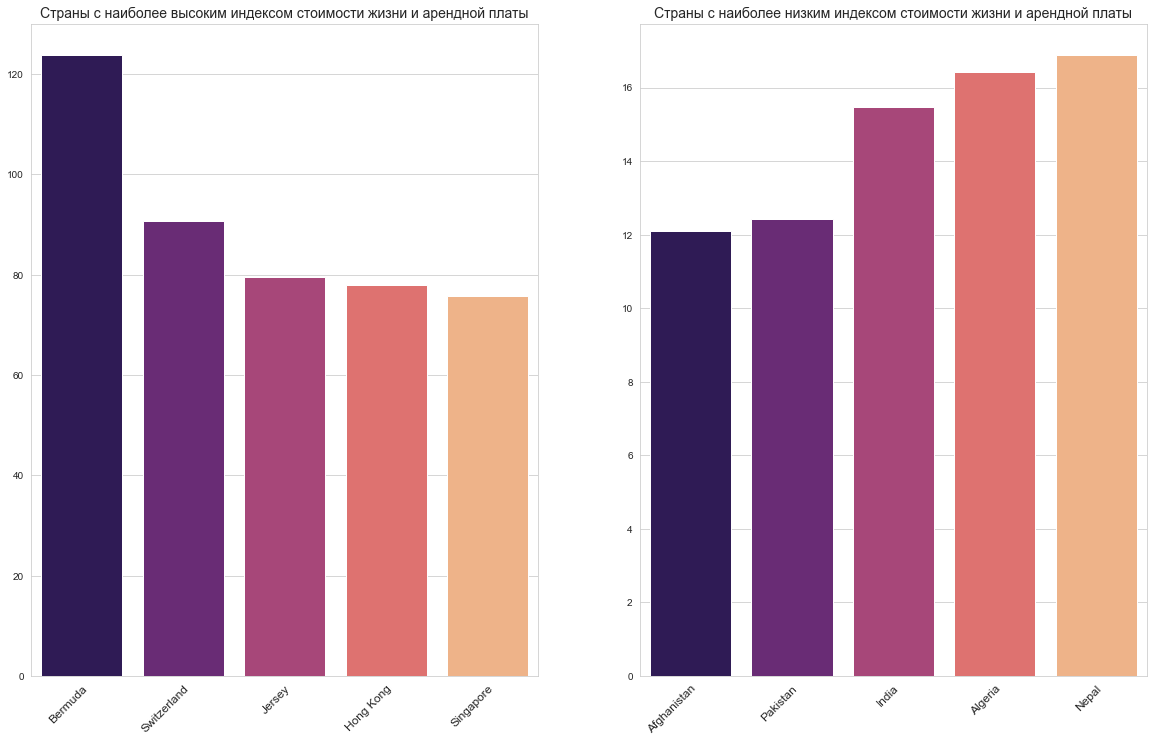

In [23]:
fig, ax=plt.subplots(1,2, figsize=(20, 12))

sns.barplot(data=living_rent_max, x='country', y='cost of living plus rent index', ax=ax[0])
sns.barplot(data=living_rent_min, x='country', y='cost of living plus rent index', ax=ax[1])

ax[0].set_title('Страны с наиболее высоким индексом стоимости жизни и арендной платы', fontsize=14)
ax[1].set_title('Страны с наиболее низким индексом стоимости жизни и арендной платы', fontsize=14)

labels1 = [item.get_text() for item in ax[0].get_xticklabels()]
ax[0].set_xticklabels(labels1, rotation=45, rotation_mode='anchor', ha='right', fontsize=12)
labels2 = [item.get_text() for item in ax[1].get_xticklabels()]
ax[1].set_xticklabels(labels2, rotation=45, rotation_mode='anchor', ha='right', fontsize=12)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.show()

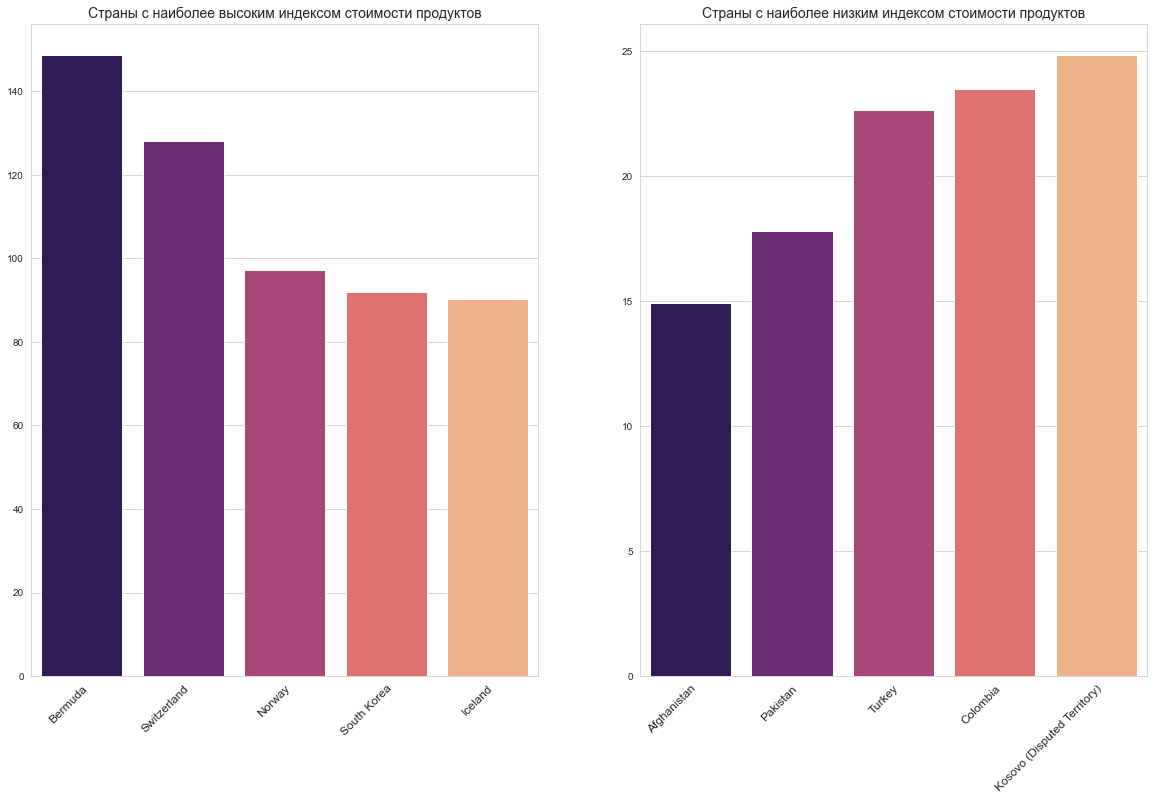

In [24]:
fig, ax=plt.subplots(1,2, figsize=(20, 12))

sns.barplot(data=groceries_max, x='country', y='groceries index', ax=ax[0])
sns.barplot(data=groceries_min, x='country', y='groceries index', ax=ax[1])

ax[0].set_title('Страны с наиболее высоким индексом стоимости продуктов', fontsize=14)
ax[1].set_title('Страны с наиболее низким индексом стоимости продуктов', fontsize=14)

labels1 = [item.get_text() for item in ax[0].get_xticklabels()]
ax[0].set_xticklabels(labels1, rotation=45, rotation_mode='anchor', ha='right', fontsize=12)
labels2 = [item.get_text() for item in ax[1].get_xticklabels()]
ax[1].set_xticklabels(labels2, rotation=45, rotation_mode='anchor', ha='right', fontsize=12)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.show()

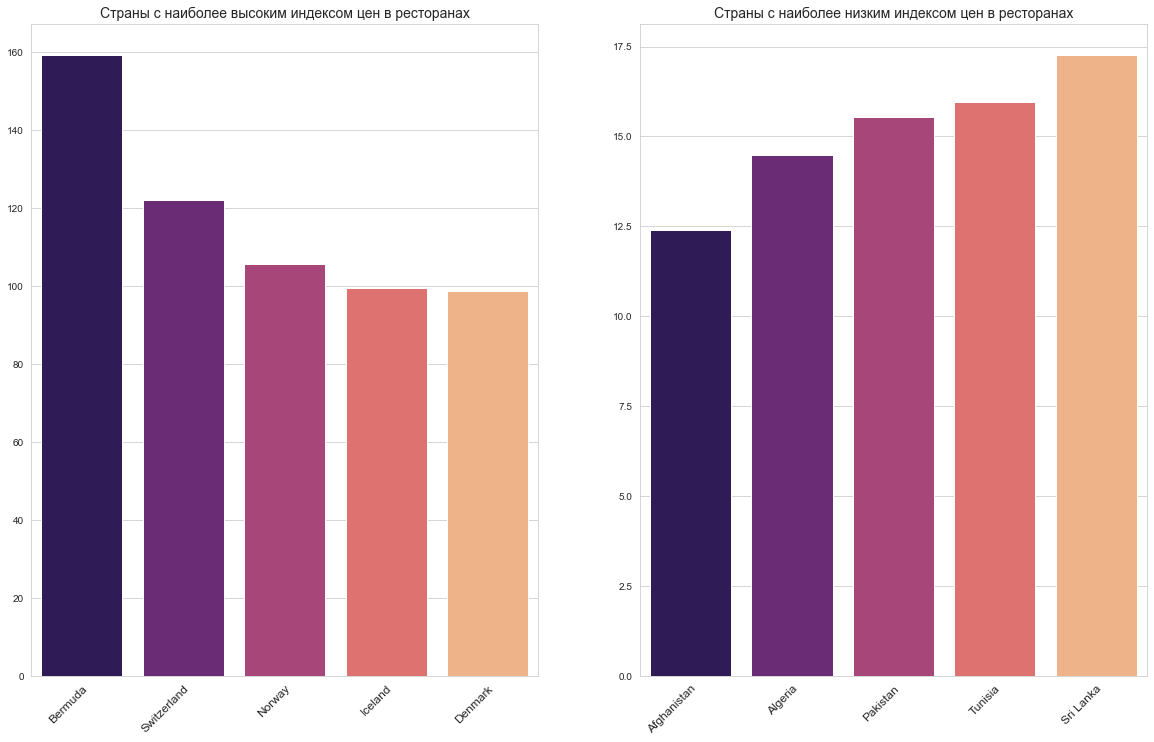

In [25]:
fig, ax=plt.subplots(1,2, figsize=(20, 12))

sns.barplot(data=restaurant_max, x='country', y='restaurant price index', ax=ax[0])
sns.barplot(data=restaurant_min, x='country', y='restaurant price index', ax=ax[1])

ax[0].set_title('Страны с наиболее высоким индексом цен в ресторанах', fontsize=14)
ax[1].set_title('Страны с наиболее низким индексом цен в ресторанах', fontsize=14)

labels1 = [item.get_text() for item in ax[0].get_xticklabels()]
ax[0].set_xticklabels(labels1, rotation=45, rotation_mode='anchor', ha='right', fontsize=12)
labels2 = [item.get_text() for item in ax[1].get_xticklabels()]
ax[1].set_xticklabels(labels2, rotation=45, rotation_mode='anchor', ha='right', fontsize=12)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.show()

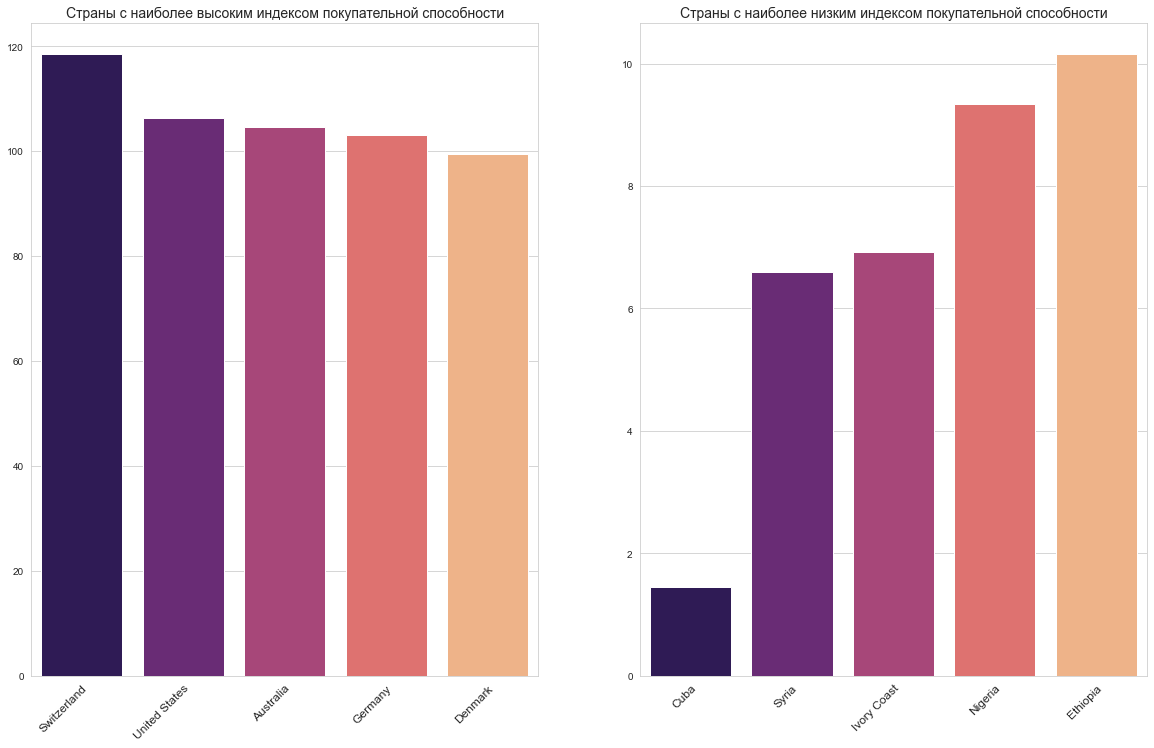

In [26]:
fig, ax=plt.subplots(1,2, figsize=(20, 12))

sns.barplot(data=power_max, x='country', y='local purchasing power index', ax=ax[0])
sns.barplot(data=power_min, x='country', y='local purchasing power index', ax=ax[1])

ax[0].set_title('Страны с наиболее высоким индексом покупательной способности', fontsize=14)
ax[1].set_title('Страны с наиболее низким индексом покупательной способности', fontsize=14)

labels1 = [item.get_text() for item in ax[0].get_xticklabels()]
ax[0].set_xticklabels(labels1, rotation=45, rotation_mode='anchor', ha='right', fontsize=12)
labels2 = [item.get_text() for item in ax[1].get_xticklabels()]
ax[1].set_xticklabels(labels2, rotation=45, rotation_mode='anchor', ha='right', fontsize=12)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.show()

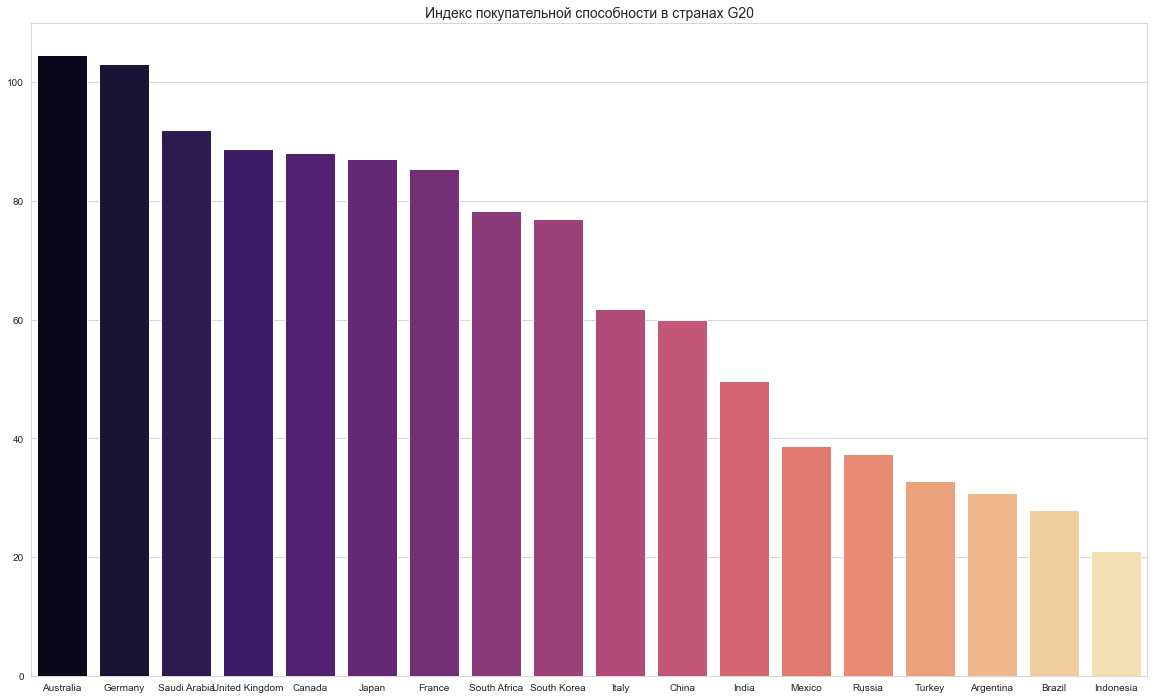

In [27]:
plt.figure(figsize=(20, 12))
sns.barplot(data=data_20.sort_values(
    by='local purchasing power index', ascending=False), x='country', y='local purchasing power index', palette='magma')
plt.xlabel('')
plt.ylabel('')
plt.title('Индекс покупательной способности в странах G20', fontsize=14)
plt.show()

In [28]:
data['local purchasing power index'].median()

37.22

In [29]:
data_20['local purchasing power index'].median()

69.295

In [30]:
data.to_csv('data.csv')